In [1]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 4],
    'savefig.facecolor': 'white',
    'figure.dpi': 150.0,
    'font.size': 12.0,
})

При увеличении частоты УЗ волн расстояние между полосами увеличивается

## Первый способ

**Расстояние между наиболее чёткими дифракционными картинами**

In [2]:
Lambda = 50+38-14
Lambda = Lambda * 10 * 2 # в микронах удвоенное +- 2 микрона

Lambda = Lambda * 1e-6 # длина УЗ волны в м
nu = 1.0597e6 # частота в Гц

v = Lambda * nu # Скорость звука в воде по формуле (5)
v

1568.356

In [5]:
Lambda = 50+38-14
Lambda = Lambda * 10 * 2 # в микронах удвоенное +- 2 микрона
Lambda

1480

## Второй способ

**Положения максимумов на разных частотах** в делениях винта (цена -- 4 мкм, погр 4 мкм)

In [3]:
x_array = np.array([
    (1.059, 3, [-106, -69, -34, 2, 36, 72, 108]),
    # (2.898, 2, [-194, -96, 1, 101, 199]),
    (1.210, 2, [-81, -40, 0, 42, 81]),
    # (2.951, 1, [-98, 0, 99]),
    (0.902, 2, [-58, -29, 1, 30, 61]),
    (0.294, 1, [-10, 0, 9]),
    (0.439, 2, [-29, -14, 0, 16, 30]),
    (0.669, 2, [-47, -24, 0, 23, 46])
],
dtype=[('frequency', 'f4'), ('count', 'i4'), ('data', 'O')])
x_array.sort(0)

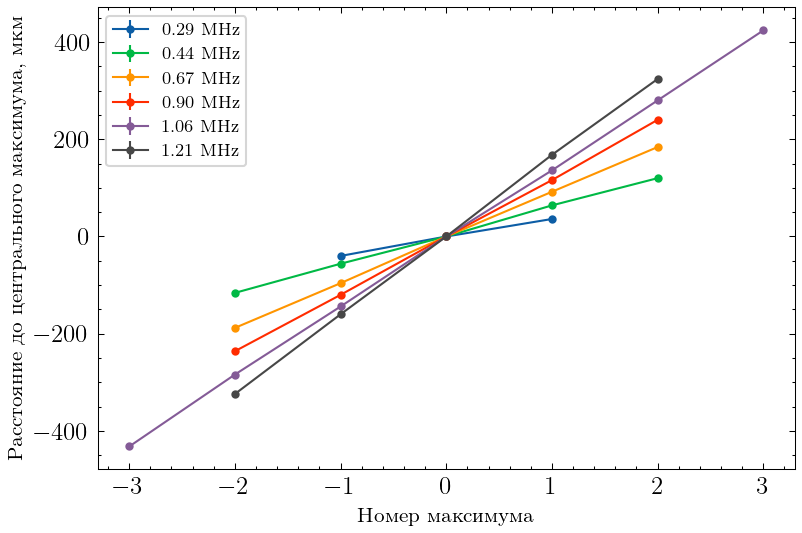

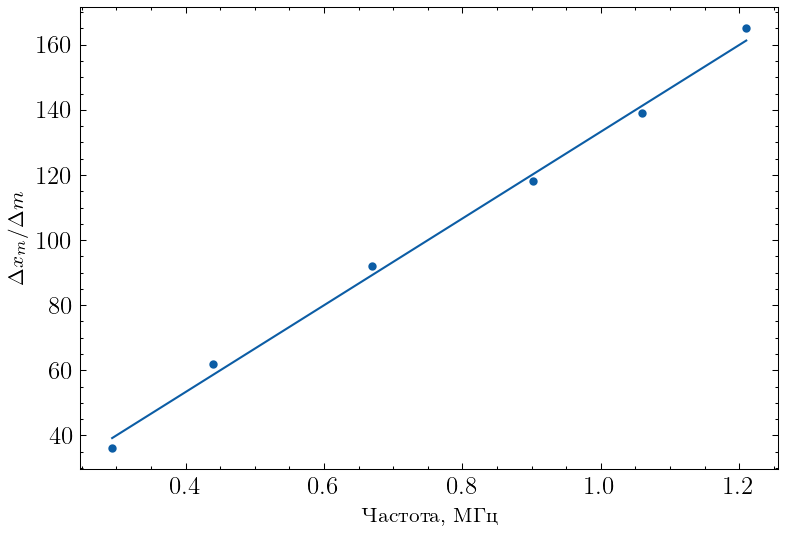

In [4]:
k1 = []
for x in x_array:
    count = x['count']
    m = np.linspace(-count, count, count * 2 + 1, dtype=np.int32)
    y = 4 * np.array(x['data'])
    y = y - y[count]
    k1.append(np.mean(y[count+1:] / m[count+1:]))
    
    plt.errorbar(m, y, yerr=4, label=f'${x["frequency"]:.2f}$ MHz', marker='.')
    
plt.xlabel('Номер максимума', fontsize='small')
plt.ylabel('Расстояние до центрального максимума, мкм', fontsize='small')
plt.legend(frameon=True, fontsize='x-small')
plt.savefig(r'images/r_on_m.svg')
plt.show()

k2 = np.mean(k1 / x_array['frequency'])
plt.errorbar(x_array['frequency'], k1, marker='.', ls='', ms=6)
plt.plot(x_array['frequency'], k2 * x_array['frequency'], color='C0', lw=1)
plt.ylabel(r'$\Delta x_m / \Delta m$', fontsize='small')
plt.xlabel(r'Частота, МГц', fontsize='small')
plt.savefig(r'images/deltax_on_nu.svg')
plt.show()

Полоса пропускания красного фильтра 6400+-200 ангстрем

In [5]:
f = 30e-2
lamb = 640e-9
v = f * lamb / k2 * 1e12 # по формулам 5, 6
v

1440.463516686639

## Третий способ

**Длина волны по методу тёмного поля от частоты**

In [6]:
s = '''lambda[del]/2,nu[MHz]
27.33,0.599
22.00,0.708
17.60,0.901
15.33,1.023
13.14,1.243
5.53,2.889
5.33,2.980'''
s = s.split('\n')

df = pd.DataFrame([list(map(float, i.split(','))) for i in s[1:]], columns=s[0].split(','))

In [7]:
k = 2 / 43 # Цена деления окулярной шкалы микроскопа, мм

Lambda_temn = df[df.columns[0]]*2 * k * 1e-3 # длина волны по методу темн поля
nu_temn = df[df.columns[1]] * 1e6 # частота

v = np.mean(nu_temn * Lambda_temn)
v

1484.112292358804

## Дополнительно

При перемещении проволоки стало ничего не видно

Второе явление обяснить